### Masculinity Project

In this project, we will be investigating the way people think about masculinity by applying the KMeans algorithm to data from [FiveThirtyEight](https://fivethirtyeight.com/). FiveThirtyEight is a popular website known for their use of statistical analysis in many of their stories.

The full list of questions can be seen at `masculinity-survey.pdf`. FiveThirtyEight and WNYC studios used this survey to get their male readers' thoughts on masculinity. After looking through some of the questions asked in the pdf, we might want to take a look at FiveThirtyEight's article [What Do Men Think It Means To Be A Man? ](https://fivethirtyeight.com/features/what-do-men-think-it-means-to-be-a-man/) to see their major takeaways. We're going to try to find more insights using machine learning.
The file `masculinity.csv` contains the raw responses to the masculinity survey.

In [ ]:
import pandas as pd

# getting a sense of how the data is structured
survey = pd.read_csv('https://raw.githubusercontent.com/IrenaPlotka/codecademy_projects/master/masculinity_clustering_project/masculinity.csv')
print(survey.head())

In [2]:
print(survey.columns)

Index(['Unnamed: 0', 'StartDate', 'EndDate', 'q0001', 'q0002', 'q0004_0001',
       'q0004_0002', 'q0004_0003', 'q0004_0004', 'q0004_0005', 'q0004_0006',
       'q0005', 'q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004',
       'q0007_0005', 'q0007_0006', 'q0007_0007', 'q0007_0008', 'q0007_0009',
       'q0007_0010', 'q0007_0011', 'q0008_0001', 'q0008_0002', 'q0008_0003',
       'q0008_0004', 'q0008_0005', 'q0008_0006', 'q0008_0007', 'q0008_0008',
       'q0008_0009', 'q0008_0010', 'q0008_0011', 'q0008_0012', 'q0009',
       'q0010_0001', 'q0010_0002', 'q0010_0003', 'q0010_0004', 'q0010_0005',
       'q0010_0006', 'q0010_0007', 'q0010_0008', 'q0011_0001', 'q0011_0002',
       'q0011_0003', 'q0011_0004', 'q0011_0005', 'q0012_0001', 'q0012_0002',
       'q0012_0003', 'q0012_0004', 'q0012_0005', 'q0012_0006', 'q0012_0007',
       'q0013', 'q0014', 'q0015', 'q0017', 'q0018', 'q0019_0001', 'q0019_0002',
       'q0019_0003', 'q0019_0004', 'q0019_0005', 'q0019_0006', 'q0019_0007',
      

In [3]:
print(len(survey))

1189


In [4]:
# how many people said they often ask a friend for professional advice (question 7 subquestion 1)
print(survey['q0007_0001'].value_counts())

Sometimes                    537
Rarely                       324
Often                        142
Never, but open to it        123
Never, and not open to it     53
No answer                     10
Name: q0007_0001, dtype: int64


In order to use KMeans algorithm with the data, we need to first turn the responses into numerical data. We can't cluster the data using the phrases "Often" or "Rarely", but we can turn those phrases into numbers. For example, we could map the data in the following way:

- "Often" -> 4
- "Sometimes" -> 3
- "Rarely" -> 2
- "Never, but open to it" -> 1
- "Never, and not open to it" -> 0.

In [5]:
# the list of columns that have to be transformed into numderical data
cols_to_map = ["q0007_0001", "q0007_0002", "q0007_0003", "q0007_0004",
       "q0007_0005", "q0007_0006", "q0007_0007", "q0007_0008", "q0007_0009",
       "q0007_0010", "q0007_0011"]
for col in cols_to_map:
    survey[col] = survey[col].map({"Often":4, "Sometimes":3, "Rarely":2, "Never, but open to it":1, "Never, and not open to it":0})

In [7]:
# checking the results of the mapping
print(survey['q0007_0001'].value_counts())

3.0    537
2.0    324
4.0    142
1.0    123
0.0     53
Name: q0007_0001, dtype: int64


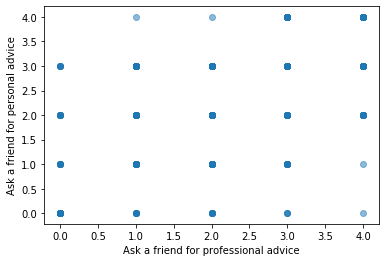

In [12]:
# plotting the data
from matplotlib import pyplot as plt

plt.scatter(survey["q0007_0001"], survey["q0007_0002"], alpha = 0.5)
plt.xlabel("Ask a friend for professional advice")
plt.ylabel("Ask a friend for personal advice")
plt.show()

The plot shows that among the men who don't ask a friend for a professional advice, there are no men who often ask a friend for a personal advice. But, on the contrary, some men who never ask for a personal advice, often ask a friend for a  professional advice. 

### KMeans Model 

Now it's time to start clustering. Let's take a look at the first four sub-questions in question 7. Those four activities aren't necessarily seen as traditionally masculine. On the other hand, sub-questions 5, 8, and 9 are often seen as very masculine activities. What would happen if we found 2 clusters based on those 7 questions? Would we find clusters that represent traditionally feminine and traditionally masculine people? Let's find out.

In [14]:
from sklearn.cluster import KMeans

# getting rid of NaN values in the columns we are interested in
rows_to_cluster = survey.dropna(subset=['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005', 'q0007_0008', 'q0007_0009'])

classifier = KMeans(n_clusters = 2)
classifier.fit(rows_to_cluster[['q0007_0001', 'q0007_0002', 'q0007_0003', 'q0007_0004', 'q0007_0005', 'q0007_0008', 'q0007_0009']])
print(classifier.cluster_centers_)

[[1.87798408 1.84350133 0.84615385 1.72413793 0.56763926 2.63660477
  1.97612732]
 [2.84425036 2.81513828 2.84133916 2.39883552 0.69577875 3.0713246
  2.89665211]]


When we look at the two clusters, the first four numbers represent the traditionally feminine activities and the last three represent the traditionally masculine activities. If the data points separated into a feminine cluser and a masculine cluseter, we would expect to see one cluster to have high values for the first four numbers and the other cluster to have high values for the last three numbers.

Instead, the first cluster has a higher value in every feature. Since a higher number means the person was more likely to "often" do something, the clusters seem to represent "people who do things" and "people who don't do things".

We might be able to find out more information about these clusters by looking at the specific members of each cluster.

In [15]:
# printing out the list of labels, showing which cluster every row in the DataFrame corresponds to
print(classifier.labels_)

[1 0 1 ... 0 0 0]


In [18]:
# separate the cluster members
cluster_zero_indices = []
cluster_one_indices = []

for i in range(len(classifier.labels_)):
    if classifier.labels_[i] == 0:
        cluster_zero_indices.append(i)
    elif classifier.labels_[i] == 1:
        cluster_one_indices.append(i)
print(cluster_zero_indices)

[1, 4, 6, 7, 9, 10, 12, 14, 17, 18, 19, 24, 29, 35, 39, 42, 49, 51, 52, 53, 54, 55, 57, 58, 62, 63, 65, 66, 75, 78, 79, 82, 84, 86, 87, 88, 89, 90, 92, 94, 95, 97, 98, 101, 106, 107, 109, 113, 116, 117, 119, 123, 128, 129, 130, 131, 132, 134, 139, 142, 143, 154, 172, 175, 176, 178, 179, 180, 181, 184, 187, 189, 195, 196, 198, 199, 201, 209, 212, 222, 229, 230, 231, 233, 236, 237, 240, 241, 247, 248, 249, 250, 256, 260, 261, 263, 264, 272, 275, 281, 283, 284, 286, 288, 291, 296, 297, 299, 300, 301, 305, 310, 311, 325, 328, 331, 336, 337, 340, 341, 343, 347, 350, 351, 353, 361, 367, 369, 377, 378, 390, 391, 392, 393, 394, 396, 397, 398, 399, 409, 410, 411, 412, 415, 417, 418, 419, 425, 428, 429, 432, 449, 454, 455, 457, 459, 461, 463, 468, 470, 471, 476, 477, 478, 484, 489, 490, 493, 494, 496, 498, 499, 502, 508, 509, 510, 515, 516, 521, 523, 525, 526, 529, 531, 533, 542, 546, 549, 555, 556, 559, 560, 562, 563, 564, 566, 567, 570, 577, 579, 580, 585, 588, 589, 592, 593, 599, 603, 610, 61

In [22]:
# investigating the cluster members

cluster_zero_df = rows_to_cluster.iloc[cluster_zero_indices]
cluster_one_df = rows_to_cluster.iloc[cluster_one_indices]

print(cluster_zero_df['educ4'].value_counts()/len(cluster_zero_df))
print()
print(cluster_one_df['educ4'].value_counts()/len(cluster_one_df))
print()
print(cluster_zero_df['age3'].value_counts()/len(cluster_zero_df))
print()
print(cluster_one_df['age3'].value_counts()/len(cluster_one_df))

Some college            0.312997
College or more         0.286472
Post graduate degree    0.251989
High school or less     0.145889
Name: educ4, dtype: float64

Post graduate degree    0.365357
College or more         0.330422
Some college            0.231441
High school or less     0.072780
Name: educ4, dtype: float64

65 and up    0.503979
35 - 64      0.432361
18 - 34      0.061008
Name: age3, dtype: float64

35 - 64      0.478894
65 and up    0.454148
18 - 34      0.066958
Name: age3, dtype: float64


After investigating the data, we've found out that by answering those 7 questions people don't fall into a "masculine" category or a "feminine" category. Instead, they seem to be divided by their level of education.
So, it's reasonable to explore other survey questions and answers. We can try to look at different beliefs and actions and find out if they are correlated to falling into a "masculine" or "feminine" category.
The new set of questions to try clustering on are 1, 2, 17 and 18.

In [24]:
print(survey['q0001'].value_counts())
print(survey['q0002'].value_counts())
print(survey['q0017'].value_counts())
print(survey['q0018'].value_counts())

Somewhat masculine      617
Very masculine          443
Not very masculine       97
Not at all masculine     21
No answer                11
Name: q0001, dtype: int64
Somewhat important      465
Not too important       401
Not at all important    180
Very important          138
No answer                 5
Name: q0002, dtype: int64
Yes          739
No           423
No answer     27
Name: q0017, dtype: int64
Always       597
Often        328
Sometimes    155
Never         54
No answer     36
Rarely        19
Name: q0018, dtype: int64


In [25]:
# transfering the data into numerical
survey['q0001'] = survey['q0001'].map({"Very masculine":3, "Somewhat masculine":2, "Not very masculine":1, "Not at all masculine":0})
survey['q0002'] = survey['q0002'].map({"Very important":3, "Somewhat important":2, "Not too important":1, "Not at all important":0})
survey['q0017'] = survey['q0017'].map({"Yes":1, "No":0})
survey['q0018'] = survey['q0018'].map({"Always":4, "Often":3, "Sometimes":2, "Rarely":1, "Never":0})
print(survey['q0001'].value_counts())
print(survey['q0002'].value_counts())
print(survey['q0017'].value_counts())
print(survey['q0018'].value_counts())

2.0    617
3.0    443
1.0     97
0.0     21
Name: q0001, dtype: int64
2.0    465
1.0    401
0.0    180
3.0    138
Name: q0002, dtype: int64
1.0    739
0.0    423
Name: q0017, dtype: int64
4.0    597
3.0    328
2.0    155
0.0     54
1.0     19
Name: q0018, dtype: int64


In [28]:
# getting rid of NaN values
new_set = survey.dropna(subset = ['q0001', 'q0002', 'q0017', 'q0018'])

classifier2 = KMeans(n_clusters = 2)
classifier2.fit(new_set[['q0001', 'q0002', 'q0017', 'q0018']])
print(classifier2.cluster_centers_)

[[2.31277533 1.53854626 0.70044053 3.64757709]
 [2.03097345 1.2920354  0.38938053 1.44690265]]


When we look at the cluster centers we expect to see low values in one cluster and high values in another cluster. Instead of that we observe that the model's  cluster values differ only for the 17th and the 18th questions. This could mean that a person's beliefs are not strong indicators of being "masculine" or "feminine", but actions, like being an initiator in relationships or paying cheque at a date, can be considered as such.